In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [2]:
data = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [3]:
data.shape

(2500, 13)

In [4]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [6]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [7]:
data['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [8]:
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [9]:
X = data.drop('Class', axis=1)
y = data['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [14]:
print("Akurasi Model:", accuracy)  
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.8744

Laporan Klasifikasi:
                precision    recall  f1-score   support

   Çerçevelik       0.87      0.89      0.88       652
Ürgüp Sivrisi       0.88      0.85      0.87       598

     accuracy                           0.87      1250
    macro avg       0.87      0.87      0.87      1250
 weighted avg       0.87      0.87      0.87      1250



In [15]:
rf_cm = confusion_matrix(y_test, y_pred)

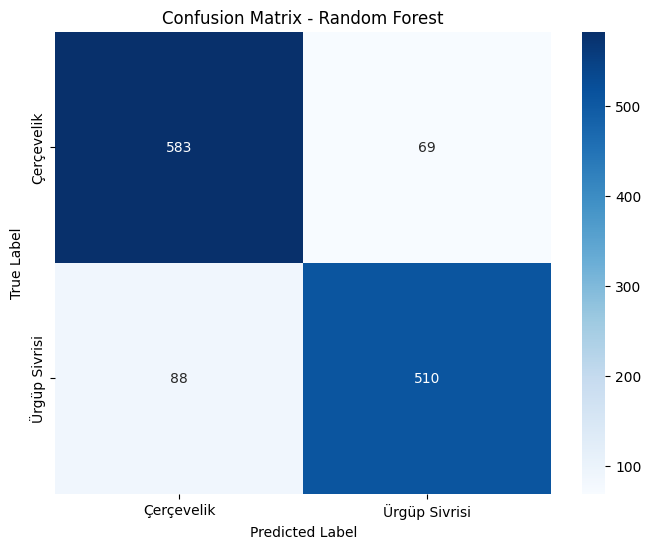

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

<Figure size 1000x700 with 0 Axes>

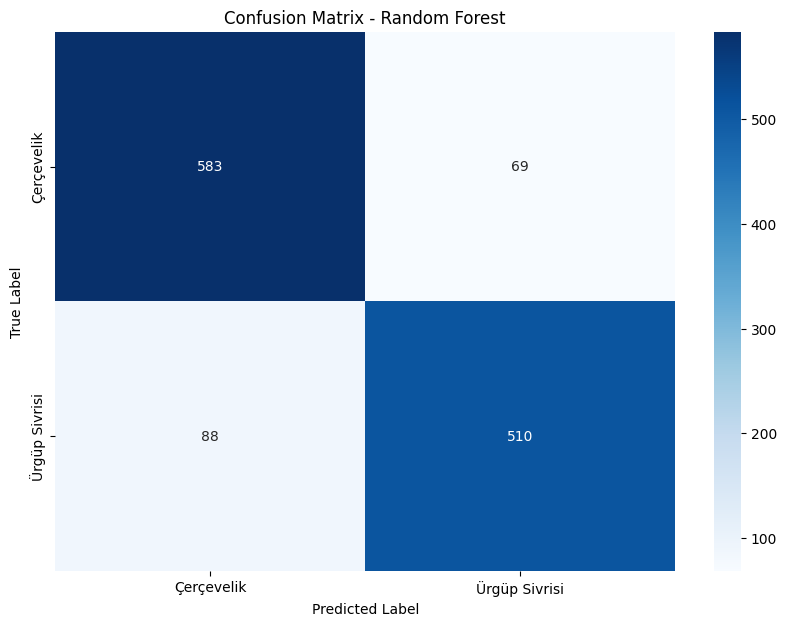

In [17]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10, 7))
plt.figure(figsize=(10, 7))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
new_data = pd.DataFrame({
    'Area': [67000, 72000],  
    'Perimeter': [950, 1000],  
    'Major_Axis_Length': [380, 400],  
    'Minor_Axis_Length': [220, 230], 
    'Convex_Area': [68000, 73000], 
    'Equiv_Diameter': [300, 310],  
    'Eccentricity': [0.8, 0.85],  
    'Solidity': [0.99, 0.98],  
    'Extent': [0.75, 0.73],  
    'Roundness': [0.85, 0.87],  
    'Aspect_Ration': [1.7, 1.8],  
    'Compactness': [0.75, 0.78]  
})
print(new_data)

new_predictions = rf_model.predict(new_data)  
new_pumpkin = le.inverse_transform(new_predictions)  
for i, name in enumerate(new_pumpkin):
    print(f"Data baru {i+1}: Prediksi Class = {name}")



    Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  67000        950                380                220        68000   
1  72000       1000                400                230        73000   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0             300          0.80      0.99    0.75       0.85            1.7   
1             310          0.85      0.98    0.73       0.87            1.8   

   Compactness  
0         0.75  
1         0.78  
Data baru 1: Prediksi Class = Çerçevelik
Data baru 2: Prediksi Class = Çerçevelik


In [19]:
import pickle  
with open("randomforest_pumpkin_model.pkl", "wb") as rf_file:
    pickle.dump(rf_model, rf_file)